Impotar las librerías

In [135]:
import pandas as pd
import mysql.connector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

Genero el df con los datos del mysql

In [136]:
conexion = mysql.connector.connect(user ='admin', password = 'migration2023', host = 'database-migration.cq1xp27nrjmz.us-east-2.rds.amazonaws.com', database = 'migration', port = '3306')
conexion

In [137]:
indicadores = pd.read_sql("SELECT * FROM migration.indicadores", conexion)
indicadores

C:\Users\I5\AppData\Local\Temp\ipykernel_3236\3899417809.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  indicadores = pd.read_sql("SELECT * FROM migration.indicadores", conexion)


,Año,Pais,Id_Pais,Crecimiento_PIB,Tasa_desempleo,Inflacion_PIB,Homicidios_intencionales,Muertes_Conflicto,Control_Corrupcion,Emisiones_CO2,Esperanza_vida,Migracion_neta,Poblacion_total,new_id
0,2000,Argentina,ARG,-0.788999,15.000,1.037287,0.000000,0.0,52.127659,132265.5,73.926000,-22770.0,3.707077e+07,1
1,2000,Australia,AUS,3.901171,6.280,2.560384,1.903464,0.0,93.617020,339422.8,79.234146,109375.0,1.902880e+07,2
2,2000,Comoros,COM,10.847879,4.658,-4.460025,0.000000,0.0,18.617022,104.9,58.757000,-2971.0,5.367580e+05,3
3,2000,Brazil,BRA,4.387949,10.530,5.606065,25.799761,0.0,57.978722,313670.8,69.737000,-1761.0,1.758737e+08,4
4,2000,China,CHN,8.490093,3.260,2.062793,0.000000,0.0,49.468086,3346525.8,71.881000,-549792.0,1.262645e+09,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4552,2016,Israel,ISR,4.521680,4.800,0.357881,1.274665,0.0,84.615387,65233.0,82.407317,13263.0,8.546000e+06,4553
4553,2016,Jamaica,JAM,1.375223,8.630,4.664171,48.310635,0.0,50.961540,7549.5,72.020000,-11329.0,2.802695e+06,4554
4554,2016,Jordan,JOR,1.994181,15.280,1.362007,1.314647,34.0,64.423080,24730.0,75.215000,49192.0,9.964656e+06,4555
4555,2016,Kazakhstan,KAZ,1.100000,4.960,13.638434,0.000000,0.0,22.115385,202475.7,72.410000,-7445.0,1.779406e+07,4556


In [138]:
indicadores2 = indicadores.loc[indicadores['Año'] == 2019].copy()
indicadores2

,Año,Pais,Id_Pais,Crecimiento_PIB,Tasa_desempleo,Inflacion_PIB,Homicidios_intencionales,Muertes_Conflicto,Control_Corrupcion,Emisiones_CO2,Esperanza_vida,Migracion_neta,Poblacion_total,new_id
3995,2019,Argentina,ARG,-2.000861,9.840,49.195579,5.155823,0.0,54.326923,168162.0,77.284000,4478.0,4.493871e+07,3996
3996,2019,Australia,AUS,2.171396,5.160,3.397723,0.887323,0.0,94.230766,395199.1,82.900000,235860.0,2.534022e+07,3997
3997,2019,Brazil,BRA,1.220778,12.050,4.224259,20.810464,0.0,40.384617,434318.0,75.338000,69186.0,2.117829e+08,3998
3998,2019,China,CHN,5.950501,4.560,1.286700,0.518967,0.0,44.711540,10762824.0,77.968000,-302609.0,1.407745e+09,3999
3999,2019,France,FRA,1.842972,8.410,1.278592,1.169259,0.0,88.942307,300561.6,82.826829,17403.0,6.738800e+07,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,2019,Virgin Islands (U.S.),VIR,2.777778,12.350,2.134873,0.000000,0.0,71.153847,0.0,79.668293,-458.0,1.066690e+05,4210
4210,2019,West Bank and Gaza,PSE,1.362687,25.340,3.849469,0.712864,0.0,42.788460,0.0,75.241000,-24737.0,4.685306e+06,4211
4211,2019,"Yemen, Rep.",YEM,0.000000,12.978,0.000000,0.000000,1776.0,0.961538,11194.8,65.092000,-39769.0,3.154669e+07,4212
4212,2019,Zambia,ZMB,1.441306,5.540,7.633470,0.000000,0.0,27.884615,7615.7,62.793000,18019.0,1.838048e+07,4213


In [139]:
indicadores2 = indicadores2[['Pais', 'Crecimiento_PIB', 'Tasa_desempleo', 'Muertes_Conflicto', 'Control_Corrupcion']]

In [140]:
indicadores2

,Pais,Crecimiento_PIB,Tasa_desempleo,Muertes_Conflicto,Control_Corrupcion
3995,Argentina,-2.000861,9.840,0.0,54.326923
3996,Australia,2.171396,5.160,0.0,94.230766
3997,Brazil,1.220778,12.050,0.0,40.384617
3998,China,5.950501,4.560,0.0,44.711540
3999,France,1.842972,8.410,0.0,88.942307
...,...,...,...,...,...
4209,Virgin Islands (U.S.),2.777778,12.350,0.0,71.153847
4210,West Bank and Gaza,1.362687,25.340,0.0,42.788460
4211,"Yemen, Rep.",0.000000,12.978,1776.0,0.961538
4212,Zambia,1.441306,5.540,0.0,27.884615


Hago un csv con los datos para utilizar en el main

In [141]:
indicadores2.to_csv('indicadores.csv', index = False)

Hago la correlacion de los datos con respecto a la variable objetivo

In [142]:
columnas_numericas = indicadores.select_dtypes(include=['float64', 'int64']).columns.difference(["Poblacion_total", "Año", "Pais", "Codigo_Pais"])
matriz_correlacion = indicadores[columnas_numericas].corr()
correlaciones_migracion = matriz_correlacion["Migracion_neta"]
correlaciones_migracion

Control_Corrupcion          0.207497
Crecimiento_PIB            -0.000273
Emisiones_CO2               0.190827
Esperanza_vida              0.094256
Homicidios_intencionales   -0.033264
Inflacion_PIB              -0.016504
Migracion_neta              1.000000
Muertes_Conflicto          -0.222162
Tasa_desempleo              0.001762
new_id                     -0.002965
Name: Migracion_neta, dtype: float64

Lo grafico para que quede mejor explicado

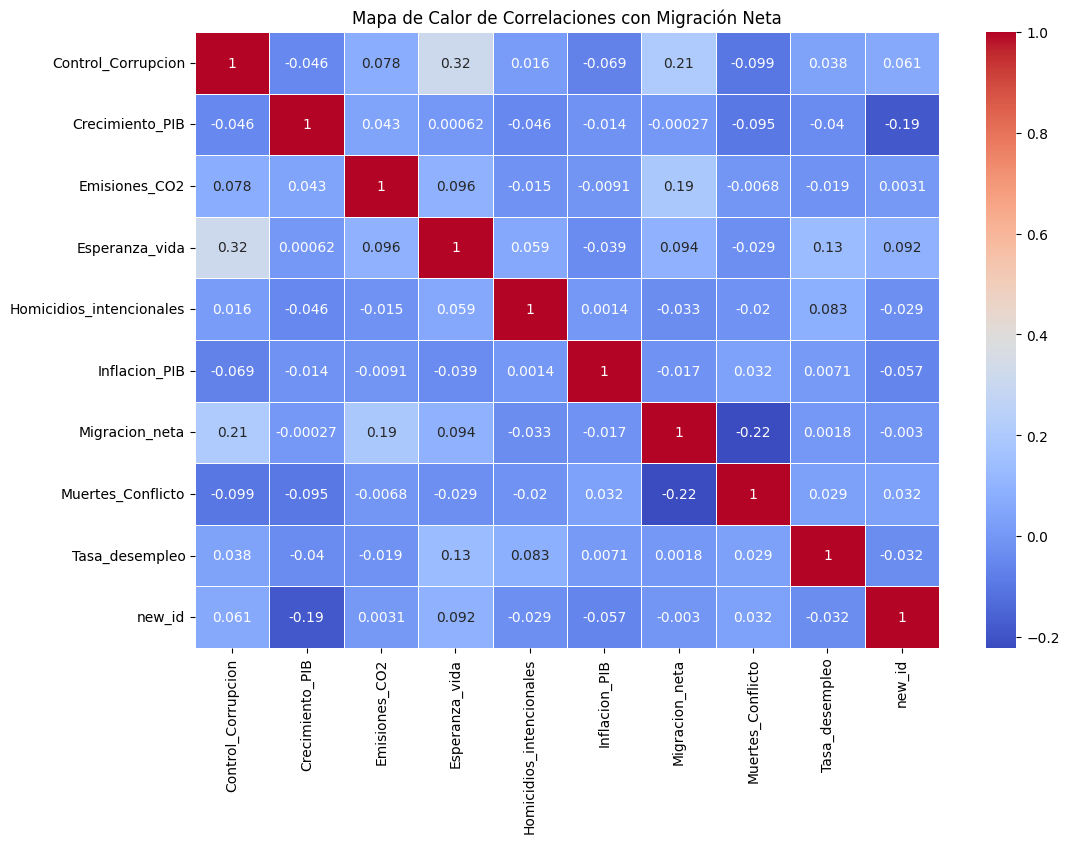

In [143]:
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones con Migración Neta")
plt.show()

Entreno el modelo

In [144]:
X = indicadores[['Crecimiento_PIB', 'Tasa_desempleo', 'Muertes_Conflicto', 'Control_Corrupcion']]
y = indicadores["Migracion_neta"]

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [147]:
y_pred = modelo.predict(X_test)

Me fijo el mse y el r2 para ver la exactitud del modelo

In [148]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 29814145111.362045
Coeficiente de determinación (R^2): 0.12800794992221476


Instancio el modelo en un archivo pikle

In [149]:
joblib.dump(modelo,"modelo_migracion.pkl")

['modelo_migracion.pkl']